# Essential Climate Variables

## All 54 variables
There are <a href="https://gcos.wmo.int/en/essential-climate-variables/table">54 essential climate variables</a>, divided in 3 categories:
- Atmosphere
- Land
- Ocean

<img src="https://nordicesmhub.github.io/climate-data-tutorial/fig/ECVs_GCOS.png" alt="alt_text" align="left"
	width="400" height="450" />

The WMO State of the Global Climate uses seven Climate Indicators to describe the changing climate:

<img src="https://ane4bf-datap1.s3.eu-west-1.amazonaws.com/wmod8_gcos/s3fs-public/2018-09/gci_1.png?l6C_ctykqckYTBoNoSCvf_uJdQaPoFtS" alt="alt_text" align="left"
	width="400" height="450" />

<a href="https://cds.climate.copernicus.eu/cdsapp#!/dataset/sis-ecv-cmip5-bias-corrected?tab=form">Copernicus Climate Data</a>

## Our variable subset (10 minutes step)

https://worldclim.org/data/worldclim21.html

- Minimum temperature (°C)
- Maximum temperature (°C)
- Average temperature (°C)
- Precipitation (mm)
- Solar radiation (kJ m-2 day-1)
- Wind speed (m s-1)
- Water vapor pressure (kPa)
- Bioclimatic variables
- Elevation

# Models
Global climate models (GCMs) for future 2021-2040, 10 minutes spatial resolution

https://worldclim.org/data/cmip6/cmip6_clim10m.html

<span style="color:green"><b>GCMs model names:</b></span>

ACCESS-CM2, ACCESS-ESM1-5, BCC-CSM2-MR, CanESM5, CanESM5-CanOE, CMCC-ESM2, CNRM-CM6-1, CNRM-CM6-1-HR, CNRM-ESM2-1, EC-Earth3-Veg, EC-Earth3-Veg-LR, FIO-ESM-2-0, GFDL-ESM4, GISS-E2-1-G, GISS-E2-1-H, HadGEM3-GC31-LL, INM-CM4-8, INM-CM5-0, IPSL-CM6A-LR, MIROC-ES2L, MIROC6, MPI-ESM1-2-HR, MPI-ESM1-2-LR, MRI-ESM2-0, UKESM1-0-LL 

<span style="color:green"><b>Shared socioeconomic pathways (SSPs):</b></span>
ssp126, ssp245, ssp370, ssp585

<p style="margin-bottom: 1em;"><span style="color:green"><b>The climate variables:</b></span>
tmin (tn) - monthly average minimum temperature (°C), tmax (tx) - monthly average maximum temperature (°C), prec (pr) - monthly total precipitation (mm), and bioc (bc) - <span style="color:green">bioclimatic variables</span> (the following 19 variables).</p>
    
BIO1 = Annual Mean Temperature

BIO2 = Mean Diurnal Range (Mean of monthly (max temp - min temp))

BIO3 = Isothermality (BIO2/BIO7) (×100)

BIO4 = Temperature Seasonality (standard deviation ×100)

BIO5 = Max Temperature of Warmest Month

BIO6 = Min Temperature of Coldest Month

BIO7 = Temperature Annual Range (BIO5-BIO6)

BIO8 = Mean Temperature of Wettest Quarter

BIO9 = Mean Temperature of Driest Quarter

BIO10 = Mean Temperature of Warmest Quarter

BIO11 = Mean Temperature of Coldest Quarter

BIO12 = Annual Precipitation

BIO13 = Precipitation of Wettest Month

BIO14 = Precipitation of Driest Month

BIO15 = Precipitation Seasonality (Coefficient of Variation)

BIO16 = Precipitation of Wettest Quarter

BIO17 = Precipitation of Driest Quarter

BIO18 = Precipitation of Warmest Quarter

BIO19 = Precipitation of Coldest Quarter

# Future Climate Data

## Download future climate data

In [27]:
from urllib.request import urlretrieve
# Define the file name and the url name to retrieve
url_base = "https://geodata.ucdavis.edu/cmip6/10m/"
gcm_model_name = "ACCESS-CM2"
ssp_model_name = "ssp126"
feature_names = ["tmin","tmax","prec","bioc"]
data_path = "../raw_data/wc2021-2040/"
for feature_name in feature_names:
    file_name = 'wc2.1_10m_'+feature_name+'_'+gcm_model_name+'_'+ssp_model_name+'_2021-2040.tif'
    remote_url = url_base+gcm_model_name+'/'+ssp_model_name+'/'+file_name
    file_path = data_path+file_name
    # Download remote and save locally
    urlretrieve(remote_url, file_path)

## Display the future climate data

Docs

https://pypi.org/project/latlon-utils/

https://gis.stackexchange.com/questions/428728/get-lanlon-and-values-from-geotiff-using-python

In [20]:
import rasterio
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline

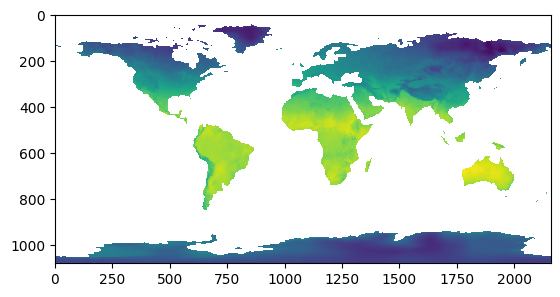

In [33]:
for file in listdir(data_path):
    data = rasterio.open(data_path+file).read()
    plt.imshow(data[0,:,:])

In [35]:
data.shape

(12, 1080, 2160)

In [2]:
# !pip install latlon_utils
# !conda install rasterio xarray
from latlon_utils import get_climate

# limit the number of columns printed by pandas
import pandas; pandas.options.display.max_columns = 5
get_climate(50, 10)

Extracting /tmp/worldclim_il4flz_u/wc2.1_10m_tavg.zip
Saving as netcdf file to /root/.local/share/latlon_utils/tavg_10m.nc


/root/.pyenv/versions/3.10.6/envs/planetary_garden/lib/python3.10/site-packages/netCDF4/utils.py:76: RuntimeWarning: overflow encountered in multiply
  datout = np.around(scale*data)/scale


Extracting /tmp/worldclim_1dvcholj/wc2.1_10m_prec.zip
Saving as netcdf file to /root/.local/share/latlon_utils/prec_10m.nc


tavg  jan     0.053223
      feb     0.958252
      mar     4.760742
      apr     8.333008
      mai    13.220520
      jun    16.089722
      jul    17.987976
      aug    17.847229
      sep    13.790222
      oct     8.807007
      nov     4.054260
      dec     1.496521
      djf     0.835999
      mam     8.771423
      jja    17.308309
      son     8.883830
      ann     8.949890
prec  jan    48.000000
      feb    42.000000
      mar    44.000000
      apr    44.000000
      mai    56.000000
      jun    68.000000
      jul    65.000000
      aug    52.000000
      sep    47.000000
      oct    52.000000
      nov    52.000000
      dec    59.000000
      djf    49.666667
      mam    48.000000
      jja    61.666667
      son    50.333333
      ann    52.416667
Name: (50, 10), dtype: float64

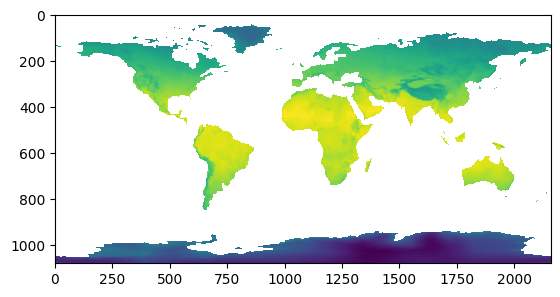

In [24]:
plt.imshow(fut_data_2[0,:,:])

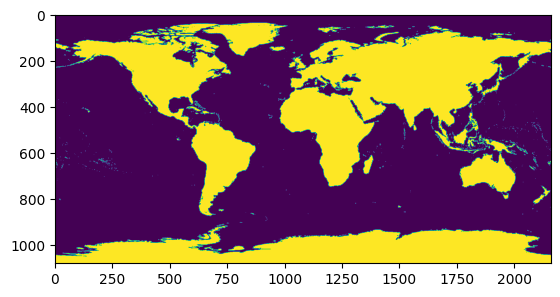

In [21]:
plt.imshow(data[0,:,:])